# Importing Required Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Importing File **From Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
  df=pd.read_csv("/content/drive/My Drive/Colab/Project/KC1_Castro.csv")
except Exception as e:
  print(e)
d1=df

# Displaying The **CSV** File

In [ ]:
d1

,ID,Edad,Sexo,Ojo,AVSC,Esfera,Cilindro,Eje,AVCC,EQ. ESF,K1,K1 Eje,K2,K2 Eje,Km,KMAX,Q,IVA,K1.1,K1 Eje.1,K2.1,K2 Eje.1,Km.1,Q.1,ECC,ECMin,X ECMin,Y ECMin,RMS Total,RMS HOA,Astigm 2 CORNEA 0,Astigm 2 CORNEA 45,COMA ANT 0,COMA POST 0,COMA CORNEA 0,COMA ANT 90,COMA POST 90,COMA CORNEA 90,TREFOIL 0,TREFOIL 30,TETRAFOIL 0,TETRAFOIL 22.5,ABERR. ESF,FECHA,Grado QC
0,1001,24,H,OD,0.05,-5.50,-1.50,30.0,1.00,-6.0,42.6,36.7,44.6,126.7,43.6,45.3,-0.17,0.14,-5.9,22.5,-6.4,112.5,-6.1,-0.11,509,503,-0.96,-0.07,2.514,0.570,-0.713,-1.739,0.002,-0.026,-0.007,-0.362,-0.027,-0.429,0.110,0.038,-0.035,0.122,0.253,4/24/2018,NORMAL
1,1002,24,H,OI,0.10,-4.75,-2.75,170.0,1.00,-6.0,42.0,165.8,45.1,75.8,43.5,45.4,-0.27,0.07,-5.8,167.2,-6.4,77.2,-6.1,-0.16,508,500,1.12,-0.07,3.052,0.344,-2.599,1.325,-0.005,0.039,0.016,-0.126,-0.055,0.191,0.080,-0.047,-0.029,-0.047,0.201,4/24/2018,NORMAL
2,1003,20,H,OD,0.15,1.00,-6.00,5.0,0.80,-2.0,41.7,1.9,48.3,91.9,44.7,50.4,-0.50,0.18,-5.9,2.2,-7.0,92.2,-6.4,-0.39,522,510,-1.04,-0.49,6.186,0.458,-6.034,-0.564,-0.144,0.002,-0.141,0.114,-0.026,0.113,-0.091,-0.037,-0.292,0.035,-0.085,6/26/2018,NORMAL
3,1004,20,H,OI,0.10,1.00,-6.00,170.0,0.90,-2.0,41.5,169.5,48.1,79.5,44.5,49.5,-0.52,0.17,-5.9,169.7,-6.9,79.7,-6.3,-0.41,522,512,0.98,-0.77,6.086,0.416,-5.523,2.264,0.222,0.015,0.251,0.040,-0.065,-0.006,0.093,0.190,-0.165,0.040,-0.068,6/26/2018,NORMAL
4,1005,23,M,OD,1.00,NaN,NaN,NaN,1.00,NaN,41.9,7.5,42.9,97.5,42.4,43.4,-0.36,0.21,-6.2,168.7,-6.4,78.7,-6.3,-0.30,580,577,-0.47,0.27,1.237,0.442,-0.810,-0.252,-0.307,0.039,-0.300,-0.127,0.024,-0.129,0.050,0.158,-0.104,-0.138,0.131,1/22/2019,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,3079,19,M,OI,0.30,NaN,NaN,NaN,0.30,NaN,54.2,152.3,64.9,62.3,59.1,79.7,-1.81,1.79,-8.0,156.0,-10.0,66.0,-8.9,-1.95,378,369,1.18,-0.68,30.288,6.628,-4.033,4.064,3.925,-0.885,3.674,-3.751,0.767,-3.611,-0.525,0.335,-0.803,0.606,-3.408,6/12/2018,QC 4
201,3080,48,M,OI,0.05,NaN,NaN,NaN,0.05,NaN,56.2,177.8,59.4,87.8,57.8,76.4,-1.44,-1.44,-8.5,165.8,-9.5,75.8,-9.0,-1.81,454,416,0.77,-0.58,25.130,6.544,-5.477,-0.605,1.640,-0.765,1.109,-6.129,1.608,-5.521,-1.432,1.767,-0.661,-0.132,-2.037,6/5/2018,QC 4
202,3081,59,H,OD,0.05,NaN,NaN,NaN,0.05,NaN,52.8,53.0,60.6,143.0,56.5,65.6,-1.18,1.27,-8.2,56.5,-9.4,146.5,-8.8,-1.13,394,387,-0.42,-0.24,15.755,4.182,1.083,-5.829,-1.790,0.556,-1.497,-1.790,1.003,-3.676,-0.515,0.499,-0.382,-0.018,-0.617,11/6/2018,QC 4
203,3082,30,H,OI,0.05,-5.00,-2.00,100.0,0.20,-6.0,62.0,12.6,66.0,102.6,63.9,87.6,-2.34,2.01,-9.8,8.2,-10.9,98.2,-10.3,-2.44,364,354,-0.19,-0.37,33.428,8.496,-7.734,-1.790,0.596,-0.060,0.665,-7.977,2.241,-7.265,0.802,1.130,1.031,-0.960,-3.342,5/15/2018,QC 4


# **Classifying**

In [ ]:
k=o=t=d=f=ff=s=0
for i in df.iloc[:,-1]:
  if (i=='NORMAL'):
     k=k+1
  if(i=="QC 1"):
    o=o+1
  if (i=="QC 2"):
    t=t+1
  if(i=="QC 3"):
    d=d+1
  if (i=="QC 4"):
     f=f+1
  if(i=="QCS/QCFF"):
    ff=ff+1
  if (i==6):
    s=s+1
print("Classification:")
print("Normal: ",k)
print("QC 1: ",o)
print("QC 2: ",t)
print("QC 3: ",d)
print("QC 4: ",f)
print("QCS/QCFF: ",ff)
print("Others: ",s)

Classification:
Normal:  82
QC 1:  43
QC 2:  26
QC 3:  7
QC 4:  7
QCS/QCFF:  40
Others:  0


# Converting Strings to Numerical Representation **(Label Encoding)**

In [ ]:
labelencoder_X = LabelEncoder()
d1.loc[:,'Ojo'] = labelencoder_X.fit_transform(d1.loc[:,'Ojo'])
d1.loc[:,'Sexo'] = labelencoder_X.fit_transform(d1.loc[:,'Sexo'])
d1

,ID,Edad,Sexo,Ojo,AVSC,Esfera,Cilindro,Eje,AVCC,EQ. ESF,K1,K1 Eje,K2,K2 Eje,Km,KMAX,Q,IVA,K1.1,K1 Eje.1,K2.1,K2 Eje.1,Km.1,Q.1,ECC,ECMin,X ECMin,Y ECMin,RMS Total,RMS HOA,Astigm 2 CORNEA 0,Astigm 2 CORNEA 45,COMA ANT 0,COMA POST 0,COMA CORNEA 0,COMA ANT 90,COMA POST 90,COMA CORNEA 90,TREFOIL 0,TREFOIL 30,TETRAFOIL 0,TETRAFOIL 22.5,ABERR. ESF,FECHA,Grado QC
0,1001,24,0,0,0.05,-5.50,-1.50,30.0,1.00,-6.0,42.6,36.7,44.6,126.7,43.6,45.3,-0.17,0.14,-5.9,22.5,-6.4,112.5,-6.1,-0.11,509,503,-0.96,-0.07,2.514,0.570,-0.713,-1.739,0.002,-0.026,-0.007,-0.362,-0.027,-0.429,0.110,0.038,-0.035,0.122,0.253,4/24/2018,NORMAL
1,1002,24,0,1,0.10,-4.75,-2.75,170.0,1.00,-6.0,42.0,165.8,45.1,75.8,43.5,45.4,-0.27,0.07,-5.8,167.2,-6.4,77.2,-6.1,-0.16,508,500,1.12,-0.07,3.052,0.344,-2.599,1.325,-0.005,0.039,0.016,-0.126,-0.055,0.191,0.080,-0.047,-0.029,-0.047,0.201,4/24/2018,NORMAL
2,1003,20,0,0,0.15,1.00,-6.00,5.0,0.80,-2.0,41.7,1.9,48.3,91.9,44.7,50.4,-0.50,0.18,-5.9,2.2,-7.0,92.2,-6.4,-0.39,522,510,-1.04,-0.49,6.186,0.458,-6.034,-0.564,-0.144,0.002,-0.141,0.114,-0.026,0.113,-0.091,-0.037,-0.292,0.035,-0.085,6/26/2018,NORMAL
3,1004,20,0,1,0.10,1.00,-6.00,170.0,0.90,-2.0,41.5,169.5,48.1,79.5,44.5,49.5,-0.52,0.17,-5.9,169.7,-6.9,79.7,-6.3,-0.41,522,512,0.98,-0.77,6.086,0.416,-5.523,2.264,0.222,0.015,0.251,0.040,-0.065,-0.006,0.093,0.190,-0.165,0.040,-0.068,6/26/2018,NORMAL
4,1005,23,1,0,1.00,NaN,NaN,NaN,1.00,NaN,41.9,7.5,42.9,97.5,42.4,43.4,-0.36,0.21,-6.2,168.7,-6.4,78.7,-6.3,-0.30,580,577,-0.47,0.27,1.237,0.442,-0.810,-0.252,-0.307,0.039,-0.300,-0.127,0.024,-0.129,0.050,0.158,-0.104,-0.138,0.131,1/22/2019,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,3079,19,1,1,0.30,NaN,NaN,NaN,0.30,NaN,54.2,152.3,64.9,62.3,59.1,79.7,-1.81,1.79,-8.0,156.0,-10.0,66.0,-8.9,-1.95,378,369,1.18,-0.68,30.288,6.628,-4.033,4.064,3.925,-0.885,3.674,-3.751,0.767,-3.611,-0.525,0.335,-0.803,0.606,-3.408,6/12/2018,QC 4
201,3080,48,1,1,0.05,NaN,NaN,NaN,0.05,NaN,56.2,177.8,59.4,87.8,57.8,76.4,-1.44,-1.44,-8.5,165.8,-9.5,75.8,-9.0,-1.81,454,416,0.77,-0.58,25.130,6.544,-5.477,-0.605,1.640,-0.765,1.109,-6.129,1.608,-5.521,-1.432,1.767,-0.661,-0.132,-2.037,6/5/2018,QC 4
202,3081,59,0,0,0.05,NaN,NaN,NaN,0.05,NaN,52.8,53.0,60.6,143.0,56.5,65.6,-1.18,1.27,-8.2,56.5,-9.4,146.5,-8.8,-1.13,394,387,-0.42,-0.24,15.755,4.182,1.083,-5.829,-1.790,0.556,-1.497,-1.790,1.003,-3.676,-0.515,0.499,-0.382,-0.018,-0.617,11/6/2018,QC 4
203,3082,30,0,1,0.05,-5.00,-2.00,100.0,0.20,-6.0,62.0,12.6,66.0,102.6,63.9,87.6,-2.34,2.01,-9.8,8.2,-10.9,98.2,-10.3,-2.44,364,354,-0.19,-0.37,33.428,8.496,-7.734,-1.790,0.596,-0.060,0.665,-7.977,2.241,-7.265,0.802,1.130,1.031,-0.960,-3.342,5/15/2018,QC 4


# Counting NaN in Each Column

In [ ]:
print(d1.isnull().sum())

ID                     0
Edad                   0
Sexo                   0
Ojo                    0
AVSC                  68
Esfera                51
Cilindro              31
Eje                   31
AVCC                   0
EQ. ESF               43
K1                     0
K1 Eje                 0
K2                     0
K2 Eje                 0
Km                     0
KMAX                   0
Q                      0
IVA                    0
K1.1                   0
K1 Eje.1               0
K2.1                   0
K2 Eje.1               0
Km.1                   0
Q.1                    0
ECC                    0
ECMin                  0
X ECMin                0
Y ECMin                0
RMS Total              0
RMS HOA                0
Astigm 2 CORNEA 0      0
Astigm 2 CORNEA 45     0
COMA ANT 0             0
COMA POST 0            0
COMA CORNEA 0          0
COMA ANT 90            0
COMA POST 90           0
COMA CORNEA 90         0
TREFOIL 0              0
TREFOIL 30             0


# Filling Missing Values with **Interpolation**

In [ ]:
d2=d1.interpolate(method ='linear', limit_direction ='forward')
d2

,ID,Edad,Sexo,Ojo,AVSC,Esfera,Cilindro,Eje,AVCC,EQ. ESF,K1,K1 Eje,K2,K2 Eje,Km,KMAX,Q,IVA,K1.1,K1 Eje.1,K2.1,K2 Eje.1,Km.1,Q.1,ECC,ECMin,X ECMin,Y ECMin,RMS Total,RMS HOA,Astigm 2 CORNEA 0,Astigm 2 CORNEA 45,COMA ANT 0,COMA POST 0,COMA CORNEA 0,COMA ANT 90,COMA POST 90,COMA CORNEA 90,TREFOIL 0,TREFOIL 30,TETRAFOIL 0,TETRAFOIL 22.5,ABERR. ESF,FECHA,Grado QC
0,1001,24,0,0,0.05,-5.50,-1.500,30.0,1.00,-6.00,42.6,36.7,44.6,126.7,43.6,45.3,-0.17,0.14,-5.9,22.5,-6.4,112.5,-6.1,-0.11,509,503,-0.96,-0.07,2.514,0.570,-0.713,-1.739,0.002,-0.026,-0.007,-0.362,-0.027,-0.429,0.110,0.038,-0.035,0.122,0.253,4/24/2018,NORMAL
1,1002,24,0,1,0.10,-4.75,-2.750,170.0,1.00,-6.00,42.0,165.8,45.1,75.8,43.5,45.4,-0.27,0.07,-5.8,167.2,-6.4,77.2,-6.1,-0.16,508,500,1.12,-0.07,3.052,0.344,-2.599,1.325,-0.005,0.039,0.016,-0.126,-0.055,0.191,0.080,-0.047,-0.029,-0.047,0.201,4/24/2018,NORMAL
2,1003,20,0,0,0.15,1.00,-6.000,5.0,0.80,-2.00,41.7,1.9,48.3,91.9,44.7,50.4,-0.50,0.18,-5.9,2.2,-7.0,92.2,-6.4,-0.39,522,510,-1.04,-0.49,6.186,0.458,-6.034,-0.564,-0.144,0.002,-0.141,0.114,-0.026,0.113,-0.091,-0.037,-0.292,0.035,-0.085,6/26/2018,NORMAL
3,1004,20,0,1,0.10,1.00,-6.000,170.0,0.90,-2.00,41.5,169.5,48.1,79.5,44.5,49.5,-0.52,0.17,-5.9,169.7,-6.9,79.7,-6.3,-0.41,522,512,0.98,-0.77,6.086,0.416,-5.523,2.264,0.222,0.015,0.251,0.040,-0.065,-0.006,0.093,0.190,-0.165,0.040,-0.068,6/26/2018,NORMAL
4,1005,23,1,0,1.00,-0.50,-4.500,160.0,1.00,-2.75,41.9,7.5,42.9,97.5,42.4,43.4,-0.36,0.21,-6.2,168.7,-6.4,78.7,-6.3,-0.30,580,577,-0.47,0.27,1.237,0.442,-0.810,-0.252,-0.307,0.039,-0.300,-0.127,0.024,-0.129,0.050,0.158,-0.104,-0.138,0.131,1/22/2019,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,3079,19,1,1,0.30,-10.25,-3.125,137.5,0.30,-11.25,54.2,152.3,64.9,62.3,59.1,79.7,-1.81,1.79,-8.0,156.0,-10.0,66.0,-8.9,-1.95,378,369,1.18,-0.68,30.288,6.628,-4.033,4.064,3.925,-0.885,3.674,-3.751,0.767,-3.611,-0.525,0.335,-0.803,0.606,-3.408,6/12/2018,QC 4
201,3080,48,1,1,0.05,-8.50,-2.750,125.0,0.05,-9.50,56.2,177.8,59.4,87.8,57.8,76.4,-1.44,-1.44,-8.5,165.8,-9.5,75.8,-9.0,-1.81,454,416,0.77,-0.58,25.130,6.544,-5.477,-0.605,1.640,-0.765,1.109,-6.129,1.608,-5.521,-1.432,1.767,-0.661,-0.132,-2.037,6/5/2018,QC 4
202,3081,59,0,0,0.05,-6.75,-2.375,112.5,0.05,-7.75,52.8,53.0,60.6,143.0,56.5,65.6,-1.18,1.27,-8.2,56.5,-9.4,146.5,-8.8,-1.13,394,387,-0.42,-0.24,15.755,4.182,1.083,-5.829,-1.790,0.556,-1.497,-1.790,1.003,-3.676,-0.515,0.499,-0.382,-0.018,-0.617,11/6/2018,QC 4
203,3082,30,0,1,0.05,-5.00,-2.000,100.0,0.20,-6.00,62.0,12.6,66.0,102.6,63.9,87.6,-2.34,2.01,-9.8,8.2,-10.9,98.2,-10.3,-2.44,364,354,-0.19,-0.37,33.428,8.496,-7.734,-1.790,0.596,-0.060,0.665,-7.977,2.241,-7.265,0.802,1.130,1.031,-0.960,-3.342,5/15/2018,QC 4


# **MINMAX** Normalisation

In [ ]:
try:
  from sklearn.preprocessing import MinMaxScaler
  min_max=MinMaxScaler()
  d2.iloc[:,1:43]=min_max.fit_transform(d2.iloc[:,1:43])
except Exception as e:
  print(e)
d2

,ID,Edad,Sexo,Ojo,AVSC,Esfera,Cilindro,Eje,AVCC,EQ. ESF,K1,K1 Eje,K2,K2 Eje,Km,KMAX,Q,IVA,K1.1,K1 Eje.1,K2.1,K2 Eje.1,Km.1,Q.1,ECC,ECMin,X ECMin,Y ECMin,RMS Total,RMS HOA,Astigm 2 CORNEA 0,Astigm 2 CORNEA 45,COMA ANT 0,COMA POST 0,COMA CORNEA 0,COMA ANT 90,COMA POST 90,COMA CORNEA 90,TREFOIL 0,TREFOIL 30,TETRAFOIL 0,TETRAFOIL 22.5,ABERR. ESF,FECHA,Grado QC
0,1001,0.101695,0.0,0.0,0.000000,0.557692,0.461538,0.142857,1.000000,0.566038,0.152838,0.203012,0.140562,0.707167,0.136170,0.068282,0.831418,0.411458,0.78,0.124722,0.865385,0.617446,0.84,0.774086,0.635678,0.505085,0.395034,0.639205,0.056205,0.046668,0.534079,0.563717,0.451482,0.533872,0.445633,0.894514,0.033660,0.855998,0.639569,0.510337,0.991044,0.107801,0.844521,4/24/2018,NORMAL
1,1002,0.101695,0.0,1.0,0.052632,0.586538,0.333333,0.942857,1.000000,0.566038,0.126638,0.923034,0.160643,0.422172,0.131915,0.070485,0.793103,0.393229,0.80,0.930401,0.865385,0.416192,0.84,0.757475,0.633166,0.494915,0.864560,0.639205,0.072630,0.019485,0.390613,0.794076,0.450503,0.574270,0.449096,0.922237,0.021730,0.933634,0.627126,0.486265,0.991095,0.090963,0.832526,4/24/2018,NORMAL
2,1003,0.033898,0.0,0.0,0.105263,0.807692,0.000000,0.000000,0.789474,0.716981,0.113537,0.008924,0.289157,0.512318,0.182979,0.180617,0.704981,0.421875,0.78,0.011693,0.750000,0.501710,0.78,0.681063,0.668342,0.528814,0.376975,0.519886,0.168310,0.033197,0.129317,0.652056,0.431068,0.551274,0.425452,0.950429,0.034086,0.923867,0.556201,0.489097,0.988885,0.099133,0.766551,6/26/2018,NORMAL
3,1004,0.033898,0.0,1.0,0.052632,0.807692,0.000000,0.942857,0.894737,0.716981,0.104803,0.943670,0.281124,0.442889,0.174468,0.160793,0.697318,0.419271,0.78,0.944321,0.769231,0.430445,0.80,0.674419,0.668342,0.535593,0.832957,0.440341,0.165257,0.028145,0.168188,0.864672,0.482243,0.559354,0.484488,0.941736,0.017469,0.908966,0.632518,0.553384,0.989952,0.099631,0.770473,6/26/2018,NORMAL
4,1005,0.084746,1.0,0.0,1.000000,0.750000,0.153846,0.885714,1.000000,0.688679,0.122271,0.040156,0.072289,0.543673,0.085106,0.026432,0.758621,0.429688,0.72,0.938753,0.865385,0.424743,0.80,0.710963,0.814070,0.755932,0.505643,0.735795,0.017219,0.031273,0.526700,0.675513,0.408277,0.574270,0.401506,0.922119,0.055390,0.893564,0.614683,0.544322,0.990465,0.081897,0.816378,1/22/2019,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,3079,0.016949,1.0,1.0,0.263158,0.375000,0.294872,0.757143,0.263158,0.367925,0.659389,0.847741,0.955823,0.346585,0.795745,0.825991,0.203065,0.841146,0.36,0.868040,0.173077,0.352338,0.28,0.162791,0.306533,0.050847,0.878104,0.465909,0.904137,0.775319,0.281531,1.000000,1.000000,0.000000,1.000000,0.496417,0.371964,0.457551,0.376192,0.594449,0.984592,0.156023,0.000000,6/12/2018,QC 4
201,3080,0.508475,1.0,1.0,0.000000,0.442308,0.333333,0.685714,0.000000,0.433962,0.746725,0.989961,0.734940,0.489362,0.740426,0.753304,0.344828,0.000000,0.26,0.922606,0.269231,0.408210,0.26,0.209302,0.497487,0.210169,0.785553,0.494318,0.746665,0.765215,0.171687,0.648974,0.680509,0.074580,0.613705,0.217080,0.730294,0.218382,0.000000,1.000000,0.985785,0.082495,0.316263,6/5/2018,QC 4
202,3081,0.694915,0.0,0.0,0.000000,0.509615,0.371795,0.614286,0.000000,0.500000,0.598253,0.293921,0.783133,0.798432,0.685106,0.515419,0.444444,0.705729,0.32,0.314031,0.288462,0.811288,0.30,0.435216,0.346734,0.111864,0.516930,0.590909,0.460449,0.481116,0.670698,0.256221,0.200923,0.895587,0.221235,0.726771,0.472518,0.449411,0.380340,0.640895,0.988129,0.093853,0.643829,11/6/2018,QC 4
203,3082,0.203390,0.0,1.0,0.000000,0.576923,0.410256,0.542857,0.157895,0.566038,1.000000,0.068600,1.000000,0.572228,1.000000,1.000000,0.000000,0.898438,0.00,0.045100,0.000000,0.535918,0.00,0.000000,0.271357,0.000000,0.568849,0.553977,1.000000,1.000000,0.000000,0.559883,0.534536,0.512741,0.546837,0.000000,1.000000,0.000000,0.926586,0.819598,1.000000,0.000000,0.015225,5/15/2018,QC 4


# Raw Data Classification

In [ ]:
X=d2.iloc[:,1:43].values
y=d2.iloc[:,-1].values

#K Fold Validation
from sklearn.model_selection import RepeatedKFold 
kfraw = RepeatedKFold(n_splits=10, n_repeats=3, random_state=109) 

for train_index, test_index in kfraw.split(X):
      X_trainraw, X_testraw = X[train_index], X[test_index]
      y_trainraw, y_testraw = y[train_index], y[test_index]

**1. SVM**

In [ ]:

#Import svm model
from sklearn import svm

#Create a svm Classifier
clfraw = svm.SVC() # Linear Kernel

#Train the model using the training sets
clfraw.fit(X_trainraw, y_trainraw)

#Predict the response for test dataset
y_predraw = clfraw.predict(X_testraw)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testraw, y_predraw)*100)


Accuracy: 75.0


**2. Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clfraw = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clfraw = clfraw.fit(X_trainraw,y_trainraw)

#Predict the response for test dataset
y_predrawdtc = clfraw.predict(X_testraw)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testraw, y_predrawdtc)*100)

Accuracy: 80.0


**3. Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifierrawrfa = RandomForestClassifier(n_estimators = 100)
classifierrawrfa=classifierrawrfa.fit(X_trainraw, y_trainraw)

#Predict the response for test dataset
y_predrawrfa = classifierrawrfa.predict(X_testraw)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testraw, y_predrawrfa)*100)

Accuracy: 85.0


# 1.Univariate Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X=d2.iloc[:,1:43]
Y=d2.iloc[:,44]
test = SelectKBest(score_func=chi2, k=15)
fit = test.fit(X,Y)
scores=pd.DataFrame(fit.scores_)
cols=pd.DataFrame(X.columns)
featureScores = pd.concat([cols,scores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

#take top 15
print("\nTop 15")
print(featureScores.nlargest(15,'Score'))
print("\nTop 15 as seperate dataframe\n")

#making seperate dataframe
uvdf = d2.filter(['RMS HOA','KMAX','K2','Km','AVSC','RMS Total','COMA POST 90','K1','AVCC','ECMin','K2.1','Km.1','K1.1','Q.1','Q','Grado QC'], axis=1)
print(uvdf)

Xuv=uvdf.iloc[:,0:15].values
yuv=uvdf.iloc[:,-1].values

#K Fold Validation
from sklearn.model_selection import RepeatedKFold
kfuv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=109)

for train_index, test_index in kfuv.split(Xuv):
      X_trainuv, X_testuv = Xuv[train_index], Xuv[test_index]
      y_trainuv, y_testuv = yuv[train_index], yuv[test_index]


Top 15
           Specs      Score
28       RMS HOA  25.541016
14          KMAX  24.030611
11            K2  23.554314
13            Km  22.621787
3           AVSC  22.296488
27     RMS Total  21.395779
35  COMA POST 90  18.863582
9             K1  18.486226
7           AVCC  14.211543
24         ECMin   8.442749
19          K2.1   6.129344
21          Km.1   5.469288
17          K1.1   4.608049
22           Q.1   4.323393
15             Q   4.196842

Top 15 as seperate dataframe

      RMS HOA      KMAX        K2        Km  ...  K1.1       Q.1         Q  Grado QC
0    0.046668  0.068282  0.140562  0.136170  ...  0.78  0.774086  0.831418    NORMAL
1    0.019485  0.070485  0.160643  0.131915  ...  0.80  0.757475  0.793103    NORMAL
2    0.033197  0.180617  0.289157  0.182979  ...  0.78  0.681063  0.704981    NORMAL
3    0.028145  0.160793  0.281124  0.174468  ...  0.78  0.674419  0.697318    NORMAL
4    0.031273  0.026432  0.072289  0.085106  ...  0.72  0.710963  0.758621    NORMAL
.. 

**1.1 SVM**

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clfuv = svm.SVC() # Gaussian Kernel

#Train the model using the training sets
clfuv.fit(X_trainuv, y_trainuv)

#Predict the response for test dataset
y_preduv = clfuv.predict(X_testuv)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Univariate SVM Accuracy :",metrics.accuracy_score(y_testuv, y_preduv)*100)

Univariate SVM Accuracy : 80.0


**1.2 Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clfuvdtc = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clfuvdtc = clfuvdtc.fit(X_trainuv,y_trainuv)

#Predict the response for test dataset
y_preduvdtc = clfuvdtc.predict(X_testuv)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testuv, y_preduvdtc)*100)


Accuracy: 65.0


**1.3 Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifieruvrfa = RandomForestClassifier(n_estimators = 100)
classifieruvrfa=classifieruvrfa.fit(X_trainuv, y_trainuv)

#Predict the response for test dataset
y_preduvrfa = classifieruvrfa.predict(X_testuv)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testuv, y_preduvrfa)*100)

Accuracy: 90.0


# 2.Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


model = LogisticRegression(max_iter=200)
rfe = RFE(model, 3)
rfe.match(X, Y)
#Xr = pd.Series(fit.support_, index=X.columns)
print(fit)
"""
c=0
for i in range(len(Xr)):
  if Xr[i]=='True':
    Xs[c]=Xr[i]
    c+=1
print(Xs)
"""
"""
for i in range (X.shape[1]):
  print('Column: %d, Selected %s, Rank: %.3f' % (i+1, rfe.support_[i], rfe.ranking_[i]))
rfedf = d2.filter([K_featnames,'Grado QC'],axis=1)
rfedf

Xrfe=rfedf.iloc[:,0:5].values
yrfe=rfedf.iloc[:,-1].values

#K Fold Validation
from sklearn.model_selection import RepeatedKFold
kfrfe = RepeatedKFold(n_splits=10, n_repeats=3, random_state=None)

for train_index, test_index in kfrfe.split(Xrfe):
      X_trainrfa, X_testrfa = Xrfe[train_index], Xrfe[test_index]
      y_trainrfa, y_testrfa = yrfe[train_index], yrfe[test_index]"""

AttributeError: ignored

**2.1 SVM**

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clfrfa = svm.SVC() # Gaussian Kernel

#Train the model using the training sets
clfrfa.fit(X_trainrfa, y_trainrfa)

#Predict the response for test dataset
y_pred1rfa = clfrfa.predict(X_testrfa)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("RFE SVM Accuracy:",metrics.accuracy_score(y_testrfa, y_pred1rfa)*100)

RFE SVM Accuracy: 65.0


**2.2 Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier# Import Decision Tree Classifier

# Create Decision Tree classifer object
clfrfadtc = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clfrfadtc = clfrfadtc.fit(X_trainrfa,y_trainrfa)

#Predict the response for test dataset
y_predrfadtc = clfrfadtc.predict(X_testrfa)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testrfa, y_predrfadtc)*100)


Accuracy: 70.0


**2.3 Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifierrfarfa = RandomForestClassifier(n_estimators = 100)
classifierrfarfa=classifierrfarfa.fit(X_trainrfa, y_trainrfa)

#Predict the response for test dataset
y_predrfarfa = classifierrfarfa.predict(X_testrfa)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testrfa, y_predrfarfa)*100)

Accuracy: 65.0


# 3.Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

#combine 1 , 12, 123 , 1234
pca1 = PCA(n_components=1)
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=3)
pca4 = PCA(n_components=4)
fit1 = pca1.fit(X)
fit2 = pca2.fit(X)
fit3 = pca3.fit(X)
fit4 = pca4.fit(X)
comp1=fit1.transform(X)
comp2=fit2.transform(X)
comp3=fit3.transform(X)
comp4=fit4.transform(X)
pcd1 = pd.DataFrame(data = comp1, columns = ['principal component 1'])
pcd2 = pd.DataFrame(data = comp2, columns = ['principal component 1', 'principal component 2'])
pcd3 = pd.DataFrame(data = comp3, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
pcd4 = pd.DataFrame(data = comp4, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])
fpca1 = pd.concat([pcd1, df[['Grado QC']]], axis = 1)
fpca2 = pd.concat([pcd2, df[['Grado QC']]], axis = 1)
fpca3 = pd.concat([pcd3, df[['Grado QC']]], axis = 1)
fpca4 = pd.concat([pcd4, df[['Grado QC']]], axis = 1)

Xpca=fpca1.iloc[:,0:1].values
ypca=fpca1.iloc[:,-1].values

#K Fold Validation
from sklearn.model_selection import RepeatedKFold 
kfpca = RepeatedKFold(n_splits=10, n_repeats=3, random_state=None) 

for train_index, test_index in kfpca.split(Xpca):
      X_trainpca, X_testpca = Xpca[train_index], Xpca[test_index]
      y_trainpca, y_testpca = ypca[train_index], ypca[test_index]

**3.1 SVM**

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clfpca = svm.SVC() # Gaussian Kernel

#Train the model using the training sets
clfpca.fit(X_trainpca, y_trainpca)

#Predict the response for test dataset
y_pred1pca = clfpca.predict(X_testpca)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Pcrincipal Component Analysis SVM Accuracy:",metrics.accuracy_score(y_testpca, y_pred1pca)*100)

Pcrincipal Component Analysis SVM Accuracy: 30.0


**3.2 Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clfpcadtc = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clfpcadtc = clfpcadtc.fit(X_trainpca,y_trainpca)

#Predict the response for test dataset
y_predpcadtc = clfpcadtc.predict(X_testpca)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testpca, y_predpcadtc)*100)

Accuracy: 35.0


**3.3 Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifierpcarfa = RandomForestClassifier(n_estimators = 100)
classifierpcarfa=classifierpcarfa.fit(X_trainpca, y_trainpca)

#Predict the response for test dataset
y_predpcarfa = classifierpcarfa.predict(X_testpca)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testpca, y_predpcarfa)*100)

Accuracy: 35.0


# 4.Feature Importance

[0.02147028 0.00599973 0.0055179  0.04726581 0.01894589 0.01675308
 0.01136016 0.02275097 0.01690777 0.03612719 0.01206861 0.04223507
 0.00781678 0.04185627 0.03620052 0.01869646 0.0446981  0.02580085
 0.00890792 0.03713698 0.0144201  0.03455305 0.02983294 0.02367863
 0.03451422 0.00924372 0.01286702 0.02810448 0.03197678 0.01130972
 0.0098276  0.01106851 0.0142578  0.01444574 0.05130152 0.06575039
 0.05359753 0.01070885 0.0140767  0.01155225 0.01100076 0.02339535]


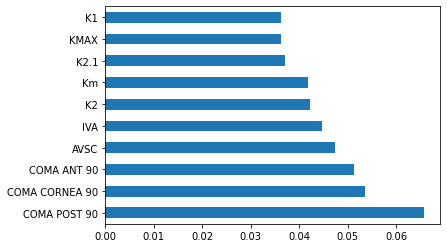

     COMA POST 90  COMA CORNEA 90  COMA ANT 90  ...      K2.1        K2  Grado QC
0        0.033660        0.855998     0.894514  ...  0.865385  0.140562    NORMAL
1        0.021730        0.933634     0.922237  ...  0.865385  0.160643    NORMAL
2        0.034086        0.923867     0.950429  ...  0.750000  0.289157    NORMAL
3        0.017469        0.908966     0.941736  ...  0.769231  0.281124    NORMAL
4        0.055390        0.893564     0.922119  ...  0.865385  0.072289    NORMAL
..            ...             ...          ...  ...       ...       ...       ...
200      0.371964        0.457551     0.496417  ...  0.173077  0.955823      QC 4
201      0.730294        0.218382     0.217080  ...  0.269231  0.734940      QC 4
202      0.472518        0.449411     0.726771  ...  0.288462  0.783133      QC 4
203      1.000000        0.000000     0.000000  ...  0.000000  1.000000      QC 4
204      0.289305        0.636739     0.658522  ...  0.230769  0.738956      QC 4

[205 rows x 11 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#take top 10
fidf = d2.filter(['COMA POST 90','COMA CORNEA 90','COMA ANT 90','AVSC','IVA','KMAX','Km','Km.1','K2.1','K2','Grado QC'],axis=1)
print(fidf)

Xfi=fidf.iloc[:,0:10].values
yfi=fidf.iloc[:,-1].values

#K Fold Validation
from sklearn.model_selection import RepeatedKFold 
kffi = RepeatedKFold(n_splits=10, n_repeats=3, random_state=None) 

for train_index, test_index in kffi.split(Xfi):
      X_trainfi, X_testfi = Xfi[train_index], Xfi[test_index]
      y_trainfi, y_testfi = yfi[train_index], yfi[test_index]

**4.1 SVM**

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clffi = svm.SVC() # Gaussian Kernel

#Train the model using the training sets
clffi.fit(X_trainfi, y_trainfi)

#Predict the response for test dataset
y_pred1fi = clffi.predict(X_testfi)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Feature Importance SVM Accuracy:",metrics.accuracy_score(y_testfi, y_pred1fi)*100)

Feature Importance SVM Accuracy: 80.0


**4.2 Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clffidtc = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clffidtc = clffidtc.fit(X_trainfi,y_trainfi)

#Predict the response for test dataset
y_predfidtc = clffidtc.predict(X_testfi)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testfi, y_predfidtc)*100)


Accuracy: 90.0


**4.3 Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifierfirfa = RandomForestClassifier(n_estimators = 100)
classifierfirfa=classifierfirfa.fit(X_trainfi, y_trainfi)

#Predict the response for test dataset
y_predfirfa = classifierfirfa.predict(X_testfi)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testfi, y_predfirfa)*100)

Accuracy: 95.0


# 5.Correlation

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


         Edad  Sexo  Ojo  ...  TETRAFOIL 0  TETRAFOIL 22.5  Grado QC
0    0.101695   0.0  0.0  ...     0.991044        0.107801    NORMAL
1    0.101695   0.0  1.0  ...     0.991095        0.090963    NORMAL
2    0.033898   0.0  0.0  ...     0.988885        0.099133    NORMAL
3    0.033898   0.0  1.0  ...     0.989952        0.099631    NORMAL
4    0.084746   1.0  0.0  ...     0.990465        0.081897    NORMAL
..        ...   ...  ...  ...          ...             ...       ...
200  0.016949   1.0  1.0  ...     0.984592        0.156023      QC 4
201  0.508475   1.0  1.0  ...     0.985785        0.082495      QC 4
202  0.694915   0.0  0.0  ...     0.988129        0.093853      QC 4
203  0.203390   0.0  1.0  ...     1.000000        0.000000      QC 4
204  0.457627   1.0  0.0  ...     0.989524        0.075521      QC 4

[205 rows x 28 columns]


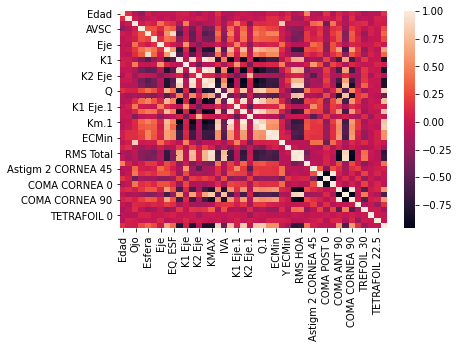

In [ ]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr)
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
data = X[selected_columns]
#Has been reduced from 42 to 30 columns
data = pd.DataFrame(data = data, columns = selected_columns)
finalDf_corr = pd.concat([data, df[['Grado QC']]], axis = 1)
print(finalDf_corr)

Xco=finalDf_corr.iloc[:,0:27].values
yco=finalDf_corr.iloc[:,-1].values

#K Fold Validation
from sklearn.model_selection import RepeatedKFold 
kfco = RepeatedKFold(n_splits=10, n_repeats=3, random_state=None) 

for train_index, test_index in kfco.split(Xco):
      X_trainco, X_testco = Xco[train_index], Xco[test_index]
      y_trainco, y_testco = yco[train_index], yco[test_index]

**5.1 SVM**


Accuracy : 60.0


[[8 0 0 0 1]
 [0 1 0 0 1]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [5 0 0 0 3]]






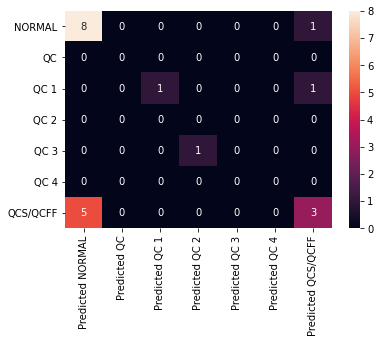

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clfco = svm.SVC(kernel="linear") # Gaussian Kernel

#Train the model using the training sets
clfco.fit(X_trainco, y_trainco)

#Predict the response for test dataset
y_pred1co = clfco.predict(X_testco)

#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics


# Model Accuracy: how often is the classifier correct?

cm = confusion_matrix(y_testco, y_pred1co)
print("\nAccuracy :",metrics.accuracy_score(y_testco, y_pred1co)*100)
print("\n")
print(cm)
print("\n")
cm = np.array(confusion_matrix(y_testco, y_pred1co, labels=["NORMAL","QC","QC 1","QC 2","QC 3","QC 4","QCS/QCFF"]))
confusion = pd.DataFrame(cm, index=["NORMAL","QC","QC 1","QC 2","QC 3","QC 4","QCS/QCFF"],columns=["Predicted NORMAL","Predicted QC","Predicted QC 1","Predicted QC 2","Predicted QC 3","Predicted QC 4","Predicted QCS/QCFF"])
sns.heatmap(confusion, annot=True)
print("\n")

**5.2 Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clfcodtc = DecisionTreeClassifier(max_depth=5)

# Train Decision Tree Classifer
clfcodtc = clfcodtc.fit(X_trainco,y_trainco)

#Predict the response for test dataset
y_predcodtc = clfcodtc.predict(X_testco)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testco, y_predcodtc)*100)

Accuracy: 55.00000000000001


**5.3 Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifiercorfa = RandomForestClassifier(n_estimators = 100)
classifiercorfa=classifiercorfa.fit(X_trainco, y_trainco)

#Predict the response for test dataset
y_predcorfa = classifiercorfa.predict(X_testco)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_testco, y_predcorfa)*100)

Accuracy: 70.0
